In [25]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [26]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [27]:
sql = pg.SQL('''
SELECT *
FROM congestion.tt_segments_baseline_v1_avg''')
all_baseline = pandasql.read_sql(sql, con)

**Note: Speeds are all calculated using mean speed unless stated otherwise**

Text(0.5, 1.0, '10th Percentile vs Overnight Speed')

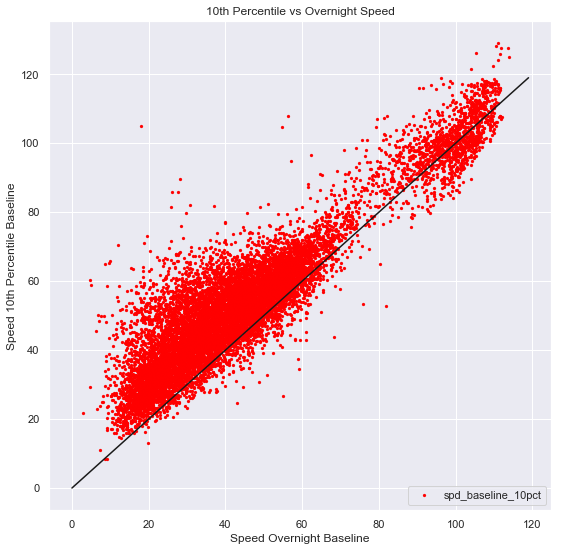

In [28]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_overnight'], all_baseline['spd_baseline_10pct'], marker = '.', linewidths =0.25, c='red')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 10th Percentile Baseline')
ax.set_title('10th Percentile vs Overnight Speed')

Text(0.5, 1.0, '15th Percentile vs Overnight Speed')

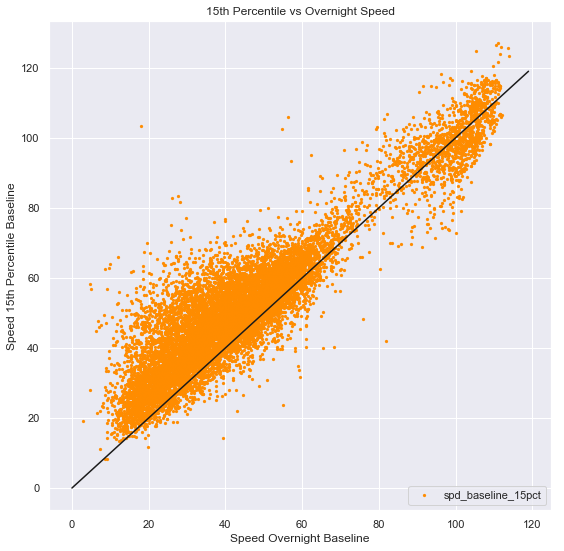

In [29]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_overnight'], all_baseline['spd_baseline_15pct'], marker = '.', linewidths =0.25, c='darkorange')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 15th Percentile Baseline')
ax.set_title('15th Percentile vs Overnight Speed')

Text(0.5, 1.0, '20th Percentile vs Overnight Speed')

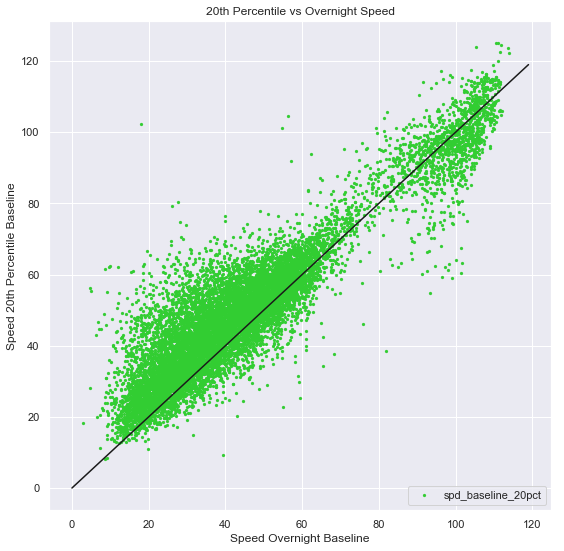

In [30]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_overnight'], all_baseline['spd_baseline_20pct'], marker = '.', linewidths =0.25, c='limegreen')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 20th Percentile Baseline')
ax.set_title('20th Percentile vs Overnight Speed')

Text(0.5, 1.0, '25th Percentile vs Overnight Speed')

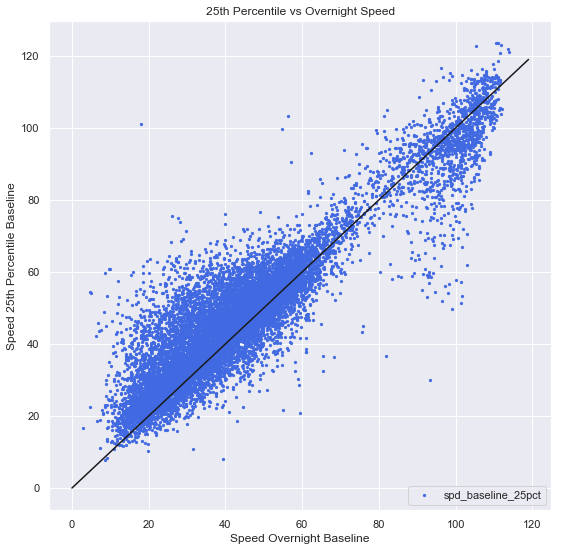

In [31]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_overnight'], all_baseline['spd_baseline_25pct'], marker = '.', linewidths =0.25, c='royalblue')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline')
ax.set_title('25th Percentile vs Overnight Speed')

Text(0.5, 1.0, '25th Percentile vs Overnight Speed')

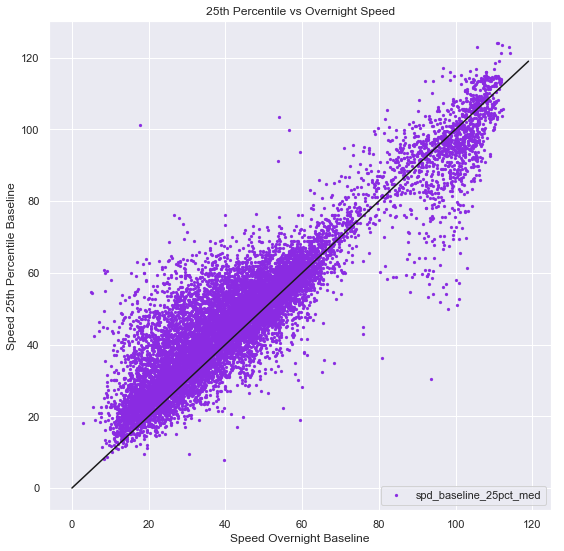

In [33]:
# Using median speed instead
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_overnight_med'], all_baseline['spd_baseline_25pct_med'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline')
ax.set_title('25th Percentile vs Overnight Speed')

Text(0.5, 1.0, '25th Percentile vs Overnight Speed (Using median speed)')

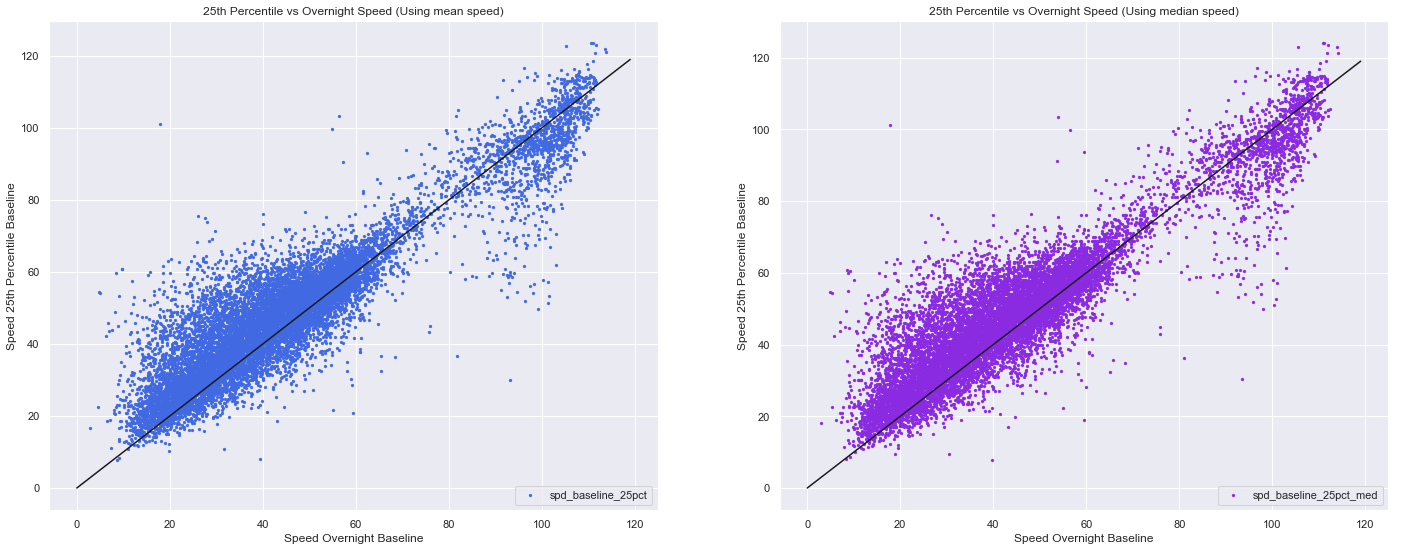

In [35]:
#comparing 25th percentile vs overnight speed using mean and median speed
fig, ax = plt.subplots (1,2, figsize=(24,9))
    
ax[0].scatter(all_baseline['spd_baseline_overnight'], all_baseline['spd_baseline_25pct'], marker = '.', linewidths =0.25, c='royalblue')
ax[0].plot(range(0,120), range(0,120), '-', color = 'k')

ax[0].legend(loc = 4)
ax[0].set_xlabel('Speed Overnight Baseline')
ax[0].set_ylabel('Speed 25th Percentile Baseline')
ax[0].set_title('25th Percentile vs Overnight Speed (Using mean speed)')

ax[1].scatter(all_baseline['spd_baseline_overnight_med'], all_baseline['spd_baseline_25pct_med'], marker = '.', linewidths =0.25, c='blueviolet')
ax[1].plot(range(0,120), range(0,120), '-', color = 'k')

ax[1].legend(loc = 4)
ax[1].set_xlabel('Speed Overnight Baseline')
ax[1].set_ylabel('Speed 25th Percentile Baseline')
ax[1].set_title('25th Percentile vs Overnight Speed (Using median speed)')


**Figures below are not useful but serve as a reference on how to plot subplots**

Text(0.5, 0.98, 'Baseline speeds comparison')

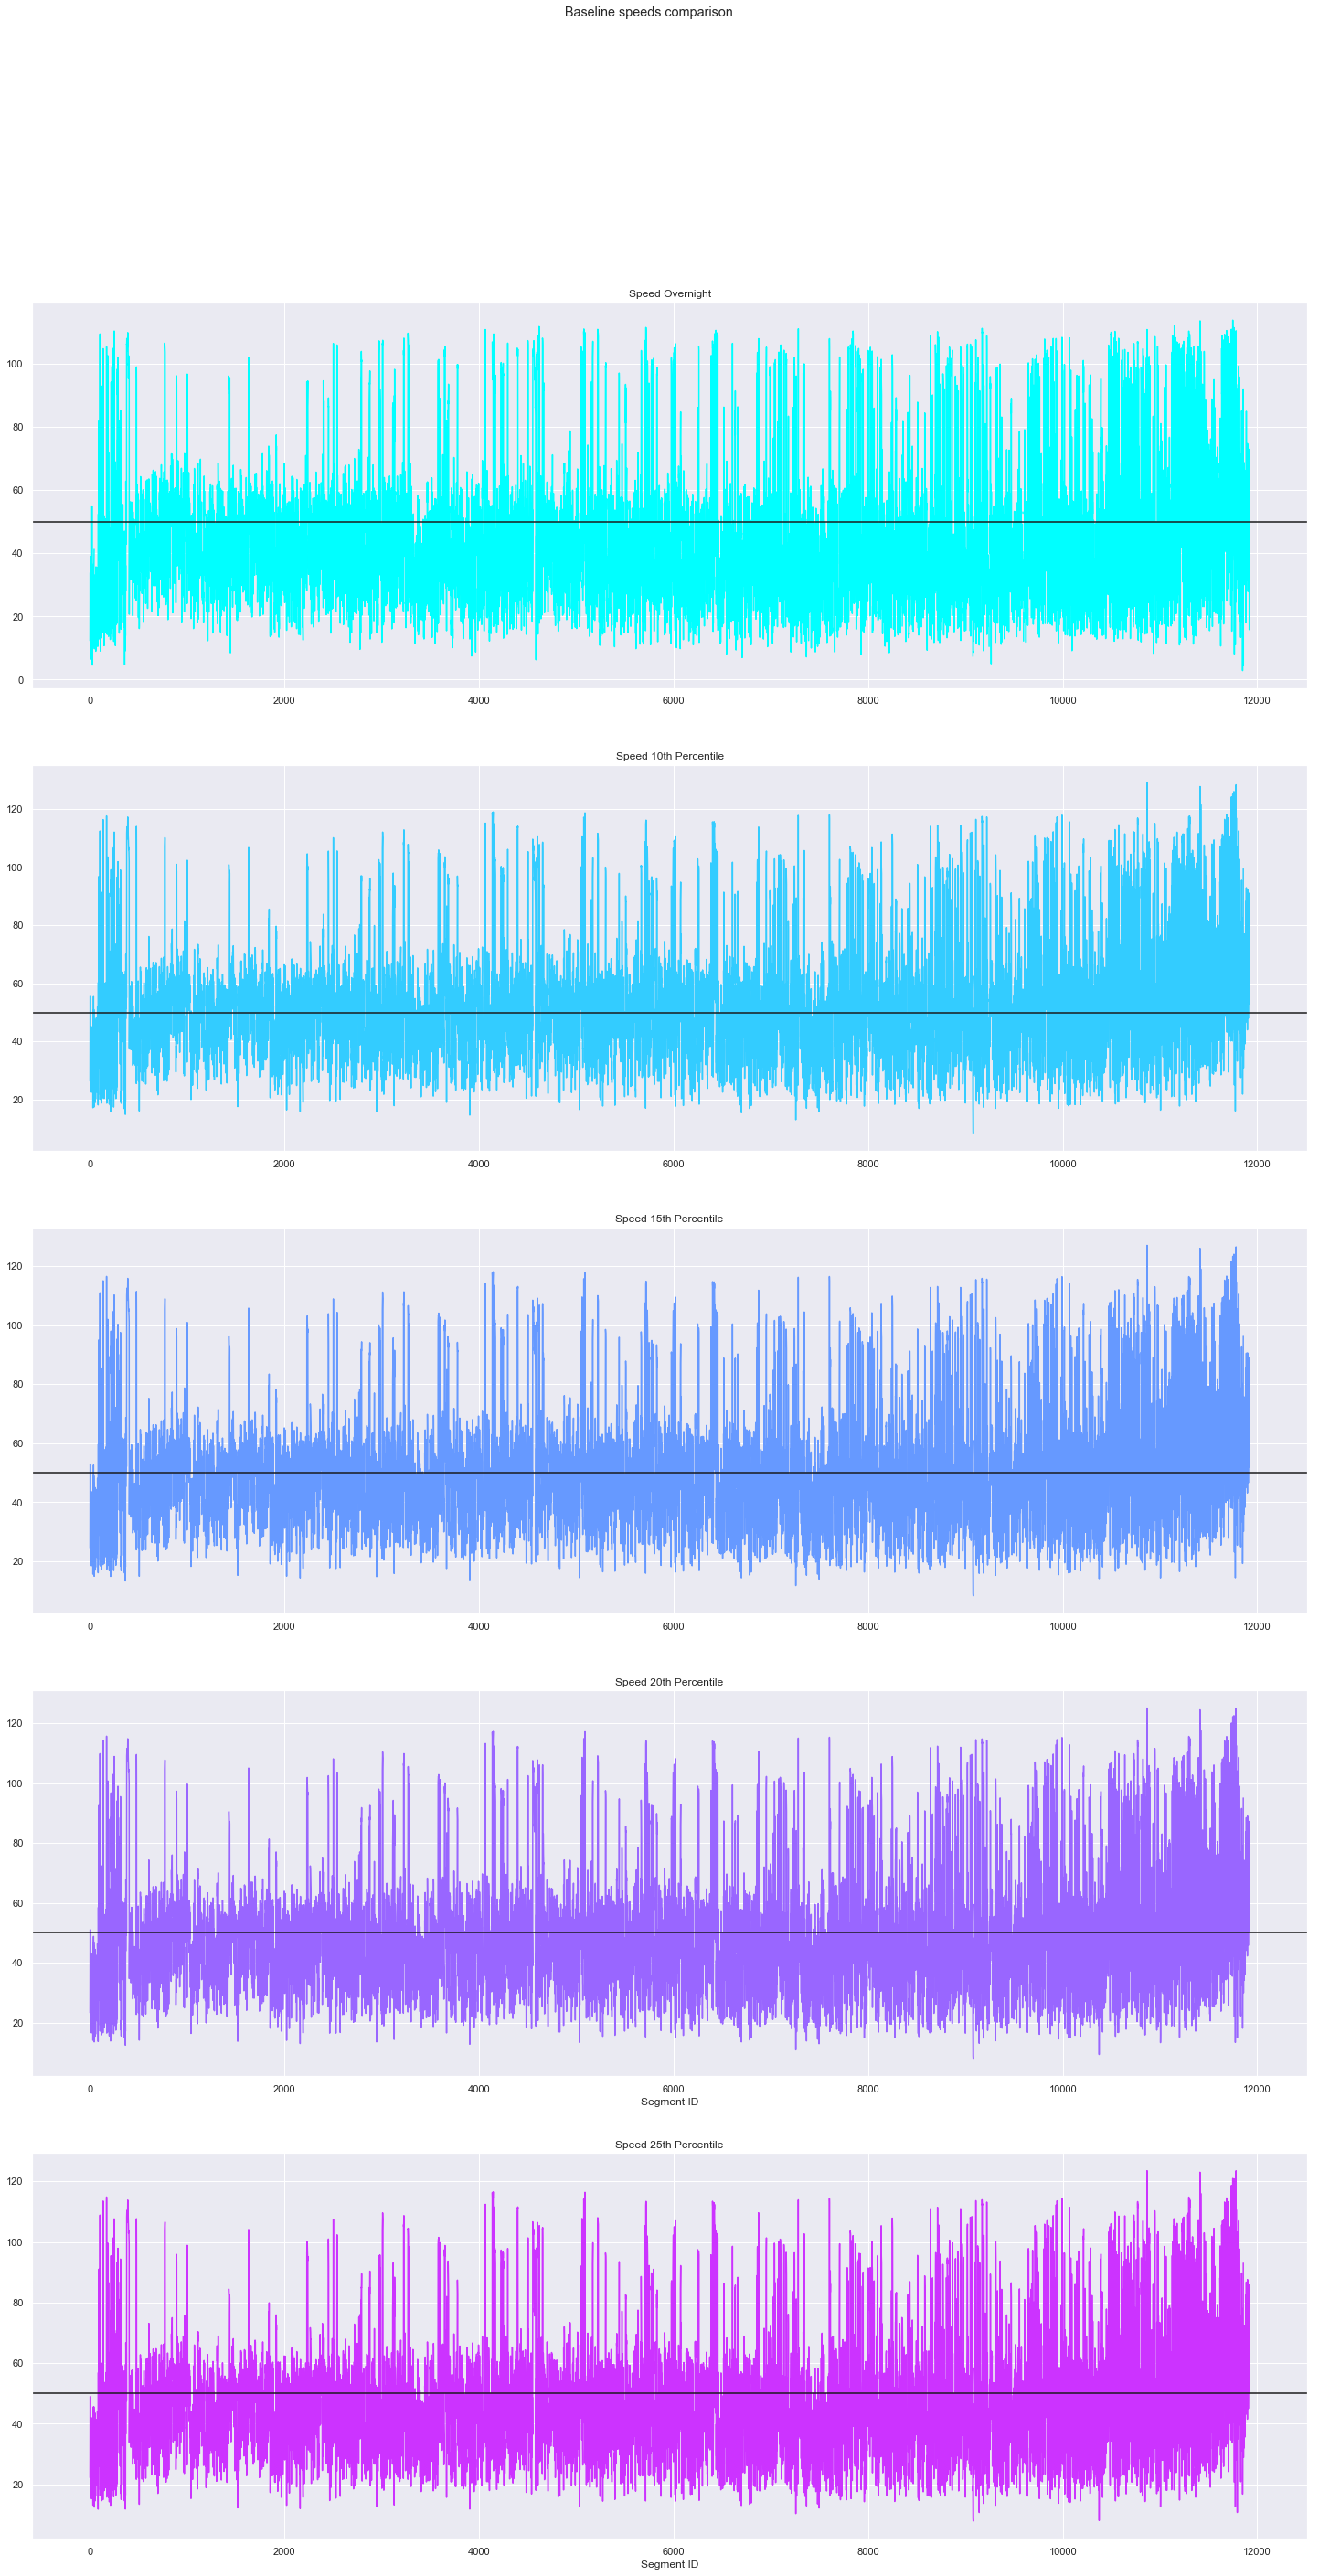

In [32]:
fig, ax = plt.subplots (5,1, figsize=(25,45))
NUM_COLORS = 5
cm = plt.get_cmap('cool')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax[0].plot(all_baseline['segment_id'].values, all_baseline['spd_baseline_overnight'], color = colors[0], markersize = 3)
handles.append(mpl.patches.Patch(label= "Overnight"))
ax[0].axhline(y=50, color='k', linestyle='-')
ax[0].set_label('Speed')
ax[0].set_title('Speed Overnight')

ax[1].plot(all_baseline['segment_id'].values, all_baseline["spd_baseline_10pct"], color = colors[1], markersize = 3)
handles.append(mpl.patches.Patch(label= "10th Percentile"))
ax[1].axhline(y=50, color='k', linestyle='-')
ax[1].set_label('Speed')
ax[1].set_title('Speed 10th Percentile')

ax[2].plot(all_baseline['segment_id'].values, all_baseline['spd_baseline_15pct'], color = colors[2], markersize = 3)
handles.append(mpl.patches.Patch(label= "15th Percentile"))
ax[2].axhline(y=50, color='k', linestyle='-')
ax[2].set_label('Speed')
ax[2].set_title('Speed 15th Percentile')

ax[3].plot(all_baseline['segment_id'].values, all_baseline["spd_baseline_20pct"], color = colors[3], markersize = 3)
handles.append(mpl.patches.Patch(label= "20th Percentile"))
ax[3].axhline(y=50, color='k', linestyle='-')
ax[3].set_xlabel('Segment ID')
ax[3].set_label('Speed')
ax[3].set_title('Speed 20th Percentile')

ax[4].plot(all_baseline['segment_id'].values, all_baseline["spd_baseline_25pct"], color = colors[4], markersize = 3)
handles.append(mpl.patches.Patch(label= "25th Percentile"))
ax[4].axhline(y=50, color='k', linestyle='-')
ax[4].set_xlabel('Segment ID')
ax[4].set_label('Speed')
ax[4].set_title('Speed 25th Percentile')

fig.suptitle('Baseline speeds comparison')